# Setup

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt
from pprint import PrettyPrinter
pp = PrettyPrinter(indent = 3)

In [2]:
data = pd.read_csv('TopCharts_unique.csv', index_col = 0)
#dataset
data.head()

,Artist,Title,Id,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness,Days
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,4,159.801,5,0,0.129,0.585,0.520,0.1240,0.000070,116
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,4,143.950,8,0,0.291,0.556,0.538,0.0689,0.000000,756
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,4,180.064,4,1,0.381,0.664,0.667,0.6400,0.000001,496
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,4,123.146,6,1,0.492,0.630,0.804,0.2150,0.000000,702
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,4,81.967,5,1,0.127,0.665,0.498,0.2280,0.000000,178


In [3]:
df = data.copy()

In [4]:
y = df["Days"]
df.drop(columns = "Days", inplace = True)

In [5]:
df.head()

,Artist,Title,Id,Time Signature,Tempo,Key,Mode,Valence,Danceability,Energy,Acousticness,Instrumentalness
0,Post Malone,rockstar,0e7ipj03S05BNilyu5bRzt,4,159.801,5,0,0.129,0.585,0.520,0.1240,0.000070
1,Post Malone,I Fall Apart,75ZvA4QfFiZvzhj2xkaWAh,4,143.950,8,0,0.291,0.556,0.538,0.0689,0.000000
2,Post Malone,Candy Paint,32lItqlMi4LBhb4k0BaSaC,4,180.064,4,1,0.381,0.664,0.667,0.6400,0.000001
3,Post Malone,Congratulations,3a1lNhkSLSkpJE4MSHpDu9,4,123.146,6,1,0.492,0.630,0.804,0.2150,0.000000
4,Post Malone,Go Flex,5yuShbu70mtHXY0yLzCQLQ,4,81.967,5,1,0.127,0.665,0.498,0.2280,0.000000


In [6]:
d = ["Artist", "Title", "Id"]
df.drop(columns = d, inplace = True)

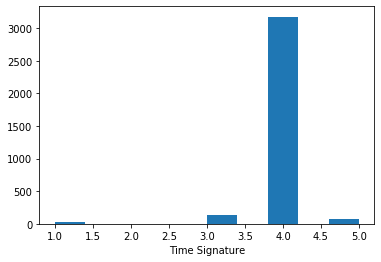

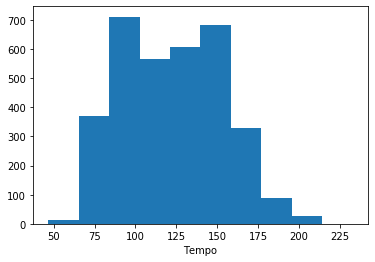

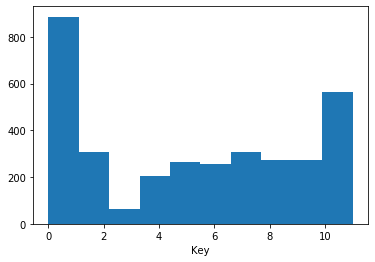

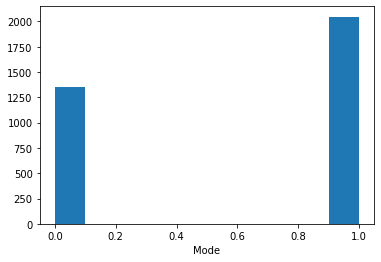

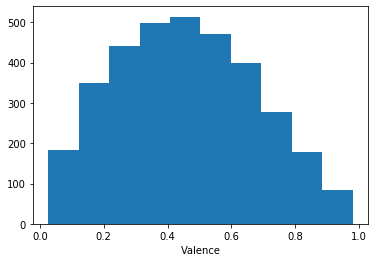

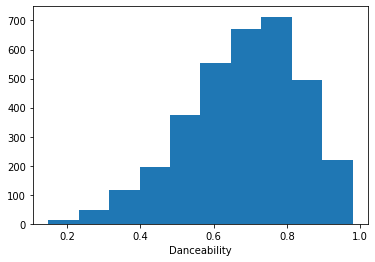

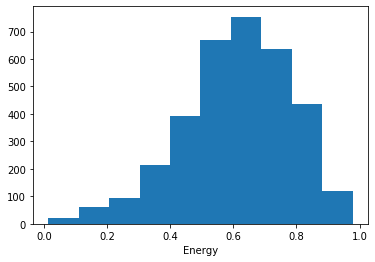

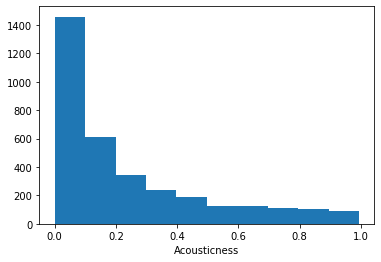

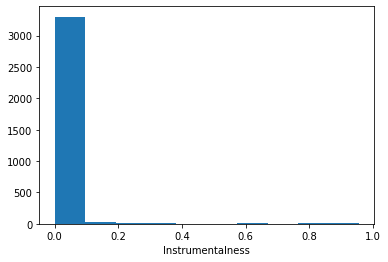

In [7]:
for col in df.columns:
    plt.hist(df[col])
    plt.xlabel(col)
    plt.show()

In [8]:
#can probably drop time sig and inst
df.drop(columns = ["Time Signature", "Instrumentalness"], inplace = True)

## Convert factor variables

In [9]:
categorical = ["Key", "Mode"]

In [10]:
df_dummy = df.copy()
for c in categorical:
    dummy = pd.get_dummies(df[c], prefix = c)
    df_dummy = pd.concat([df_dummy, dummy], axis = 1)    
df_dummy.drop(columns = categorical, inplace = True)

In [11]:
df_dummy.head()

,Tempo,Valence,Danceability,Energy,Acousticness,Key_0,Key_1,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11,Mode_0,Mode_1
0,159.801,0.129,0.585,0.520,0.1240,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,143.950,0.291,0.556,0.538,0.0689,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,180.064,0.381,0.664,0.667,0.6400,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,123.146,0.492,0.630,0.804,0.2150,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,81.967,0.127,0.665,0.498,0.2280,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## log-transform response variable

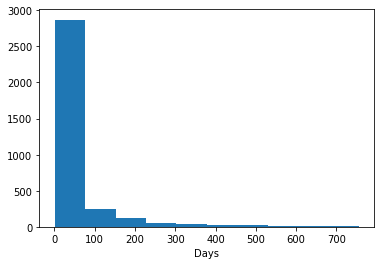

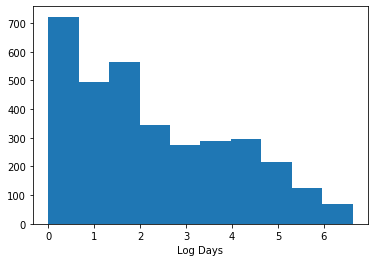

In [12]:
plt.hist(y)
plt.xlabel("Days")
plt.show()

plt.hist(np.log(y))
plt.xlabel("Log Days")
plt.show()

## Split train/test data

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
y = np.log(y)

In [15]:
X = df_dummy.copy()

In [16]:
X.head()

,Tempo,Valence,Danceability,Energy,Acousticness,Key_0,Key_1,Key_2,Key_3,Key_4,Key_5,Key_6,Key_7,Key_8,Key_9,Key_10,Key_11,Mode_0,Mode_1
0,159.801,0.129,0.585,0.520,0.1240,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,143.950,0.291,0.556,0.538,0.0689,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,180.064,0.381,0.664,0.667,0.6400,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,123.146,0.492,0.630,0.804,0.2150,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,81.967,0.127,0.665,0.498,0.2280,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
def scale(X, cols = ["Tempo" ,"Valence", "Danceability", "Energy", "Acousticness"]):
    X_scaled = X.copy()
    scaled_values = MinMaxScaler().fit_transform(X_scaled.loc[:, cols])
    for i in range(scaled_values.shape[1]):
        X_scaled.loc[:,cols[i]] = scaled_values[:,i]
    return X_scaled

In [49]:
Xs_train, Xs_test = scale(X_train), scale(X_test)

# Functions to evaluate model

In [18]:
from sklearn import metrics 

In [19]:
def evalModel(model, X_test = X_test, y_test = y_test, exp = True):
    y_pred = model.predict(X_test)
    if exp:
        y_pred_exp = np.exp(y_pred)
        y_test_exp = np.exp(y_test)
    
    scores = []
    for fn in [metrics.max_error, metrics.mean_absolute_error, metrics.median_absolute_error]:
        scores.append(fn(y_test_exp, y_pred_exp))
    
    plt.hist(y_test_exp - y_pred_exp)
    plt.xlabel("Actual - Predicted")
    plt.show()
    return dict(zip(["max_error", "Mean AE", "Median AE"], scores))     

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [21]:
med_scorer = metrics.make_scorer(metrics.median_absolute_error, False)

In [22]:
def gridsearch(model, hyperparams, X_train, y_train, random = False, n_iter = 100):
    if random:
        gs = RandomizedSearchCV(estimator = model, param_distributions = hyperparams, \
                              n_iter = n_iter, scoring = med_scorer, verbose=3, n_jobs = -1).fit(X_train, y_train)
    else:
        gs = GridSearchCV(estimator = model, verbose = 3, scoring = med_scorer, n_jobs = -1, param_grid = hyperparams).fit(X_train, y_train)
    return {"model": gs.best_estimator_, "params": gs.best_params_}

# Regression Models

## Unrestricted linear regression (baseline model)

In [23]:
from sklearn.linear_model import LinearRegression

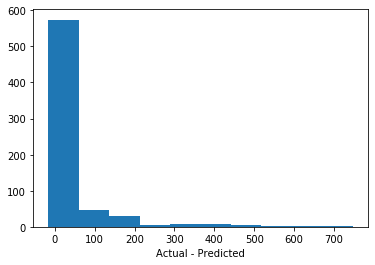

Initial model:
{'max_error': 747.0058639792752, 'Mean AE': 39.99003577114352, 'Median AE': 8.140476848148626}


In [24]:
regressor = LinearRegression().fit(X_train, y_train)
print(f"Initial model:\n{evalModel(regressor, X_test, y_test)}")

## Lasso

In [25]:
from sklearn.linear_model import Lasso

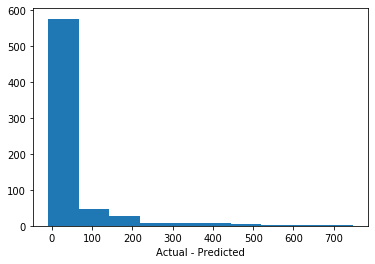

Initial model:
{'max_error': 746.7830299531565, 'Mean AE': 40.00346706433455, 'Median AE': 8.216970046843716}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.5s finished


Cross-validated params:
{'alpha': 2})


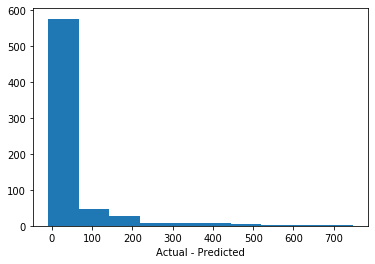

Optimized model:
{'max_error': 746.7830299531565, 'Mean AE': 40.00346706433455, 'Median AE': 8.216970046843716}


In [26]:
lasso = Lasso().fit(X_train, y_train)
print(f"Initial model:\n{evalModel(lasso, X_test, y_test)}")
params = {"alpha":np.arange(1, 11,1)}
lasso_cv = gridsearch(Lasso(), params, X_train, y_train)
print(f"Cross-validated params:\n{lasso_cv['params']})")
print(f"Optimized model:\n{evalModel(lasso_cv['model'],X_test, y_test)}")

## ElasticNet

In [27]:
from sklearn.linear_model import ElasticNet

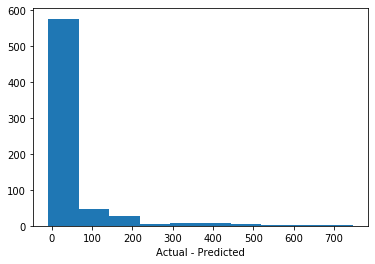

Initial model:
{'max_error': 746.7254984088219, 'Mean AE': 40.00245479514653, 'Median AE': 8.170768576206566}
Fitting 5 folds for each of 220 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


Cross-validated params:
{'alpha': 1.5, 'l1_ratio': 0.9})


[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    4.8s finished


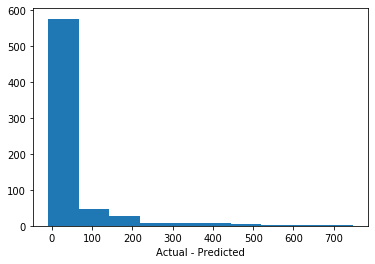

Optimized model:
{'max_error': 746.7830299531565, 'Mean AE': 40.00346706433455, 'Median AE': 8.216970046843716}


In [28]:
en = ElasticNet().fit(X_train, y_train)
print(f"Initial model:\n{evalModel(en, X_test, y_test)}")
params = {"alpha":np.arange(1, 11, .5), "l1_ratio":np.arange(0,1.1,.1)}
en_cv = gridsearch(ElasticNet(), params, X_train, y_train)
print(f"Cross-validated params:\n{en_cv['params']})")
print(f"Optimized model:\n{evalModel(en_cv['model'],X_test, y_test)}")

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

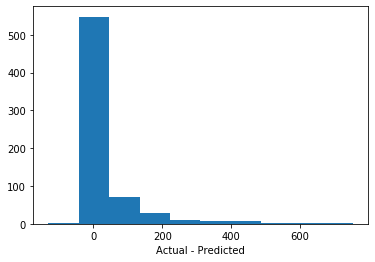

Initial model:
{'max_error': 752.5877792085316, 'Mean AE': 40.61868281095568, 'Median AE': 9.798247025262489}
Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.8min finished


Cross-validated params:
{'max_depth': 90, 'max_leaf_nodes': 90})


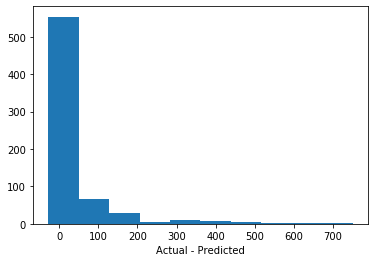

Optimized model:
{'max_error': 751.0579793742332, 'Mean AE': 40.060160177045105, 'Median AE': 8.78329722387474}


In [30]:
rf = RandomForestRegressor(n_jobs = -1).fit(X_train, y_train)
print(f"Initial model:\n{evalModel(rf, X_test, y_test)}")
params = {"max_depth":np.arange(10,100,10), "max_leaf_nodes":np.arange(10, 100, 10)}
rf_cv = gridsearch(RandomForestRegressor(), params, X_train, y_train)
print(f"Cross-validated params:\n{rf_cv['params']})")
print(f"Optimized model:\n{evalModel(rf_cv['model'],X_test, y_test)}")

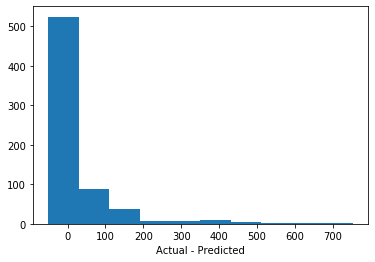

Initial model:
{'max_error': 751.9861340693731, 'Mean AE': 40.34574361752648, 'Median AE': 9.97957874222801}
Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.9min finished


Cross-validated params:
{'max_depth': 90, 'max_leaf_nodes': 90})


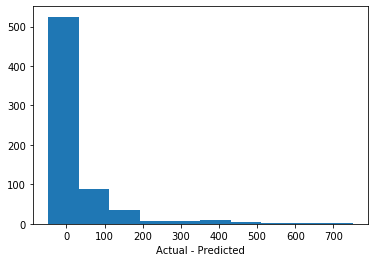

Optimized model:
{'max_error': 750.5600571168874, 'Mean AE': 40.062310079311466, 'Median AE': 8.81089149200147}


In [54]:
rfs = RandomForestRegressor(n_jobs = -1).fit(Xs_train, y_train)
print(f"Initial model:\n{evalModel(rfs, Xs_test, y_test)}")
params = {"max_depth":np.arange(10,100,10), "max_leaf_nodes":np.arange(10, 100, 10)}
rfs_cv = gridsearch(RandomForestRegressor(), params, Xs_train, y_train)
print(f"Cross-validated params:\n{rfs_cv['params']})")
print(f"Optimized model:\n{evalModel(rfs_cv['model'],Xs_test, y_test)}")

## Extreme Gradient Boosted Regression

In [31]:
from xgboost import XGBRegressor

#### Tree-based booster

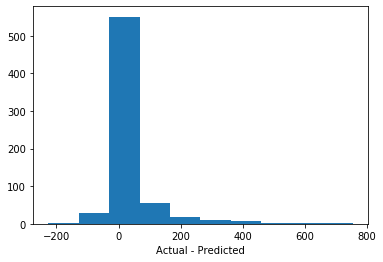

Initial model:
{'max_error': 754.977095961571, 'Mean AE': 42.80357531957767, 'Median AE': 12.024807691574095}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.8min finished


Cross-validated params:
{'lamda': 2, 'gamma': 1, 'eta': 0.1, 'booster': 'gbtree', 'alpha': 3})


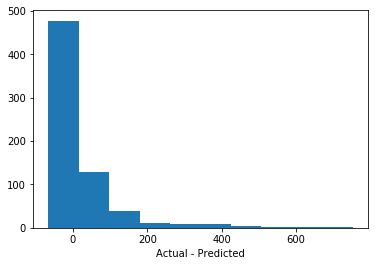

Optimized model:
{'max_error': 753.1343021392825, 'Mean AE': 40.5422813994043, 'Median AE': 9.563782691955566}


In [32]:
xgbr = XGBRegressor().fit(X_train, y_train)
print(f"Initial model:\n{evalModel(xgbr, X_test, y_test)}")
params = {"booster":["gbtree"], "eta":[.1], "gamma":[1], "lamda":np.arange(1, 11, 1), "alpha":np.arange(0, 11, 1)}
xgbr_cv = gridsearch(XGBRegressor(), params, X_train, y_train, random = True)
print(f"Cross-validated params:\n{xgbr_cv['params']})")
print(f"Optimized model:\n{evalModel(xgbr_cv['model'],X_test, y_test)}")

#### DART based booster

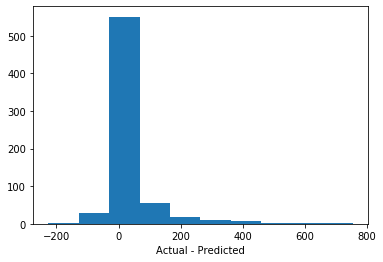

Initial model:
{'max_error': 754.9770960807803, 'Mean AE': 42.80357421583989, 'Median AE': 12.02481150627136}
Fitting 5 folds for each of 7 candidates, totalling 35 fits


C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=100. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   14.4s finished


Cross-validated params:
{'rate_drop': 0.1, 'booster': 'dart'})


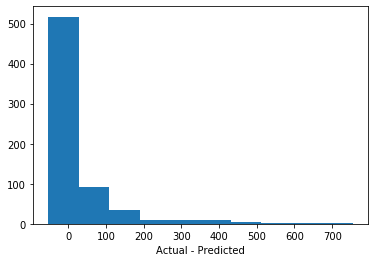

Optimized model:
{'max_error': 754.3734657764437, 'Mean AE': 40.46885362477864, 'Median AE': 9.866714954376219}


In [33]:
xgbr = XGBRegressor(booster = "dart").fit(X_train, y_train)
print(f"Initial model:\n{evalModel(xgbr, X_test, y_test)}")
params = {"booster":["dart"], "rate_drop":np.arange(0,.7,.1)}
xgbrd_cv = gridsearch(XGBRegressor(), params, X_train, y_train, random = True)
print(f"Cross-validated params:\n{xgbrd_cv['params']})")
print(f"Optimized model:\n{evalModel(xgbrd_cv['model'],X_test, y_test)}")

#### Linear based booster

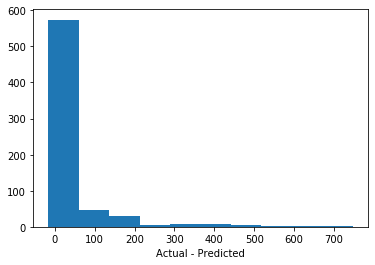

Initial model:
{'max_error': 746.7144527435305, 'Mean AE': 39.98859015072093, 'Median AE': 8.169017791748045}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.1s finished


Cross-validated params:
{'lambda': 0, 'booster': 'gblinear', 'alpha': 2})


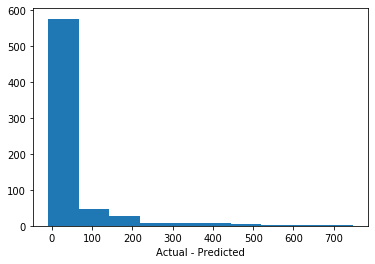

Optimized model:
{'max_error': 746.7830295562746, 'Mean AE': 40.00346711102654, 'Median AE': 8.216970443725586}


In [34]:
xgbr = XGBRegressor(booster = "gblinear").fit(X_train, y_train)
print(f"Initial model:\n{evalModel(xgbr, X_test, y_test)}")
params = {"booster":["gblinear"], "lambda":np.arange(0,10,1), "alpha":np.arange(0,10,1)}
xgbrl_cv = gridsearch(XGBRegressor(), params, X_train, y_train, random = True)
print(f"Cross-validated params:\n{xgbrl_cv['params']})")
print(f"Optimized model:\n{evalModel(xgbrl_cv['model'],X_test, y_test)}")

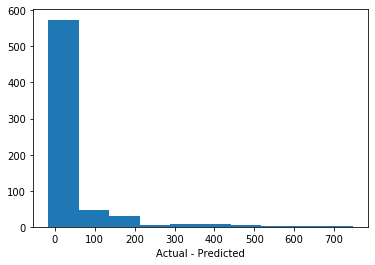

Initial model:
{'max_error': 746.7543869018557, 'Mean AE': 40.00662014624652, 'Median AE': 8.306041717529297}
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   28.8s finished


Cross-validated params:
{'lambda': 1, 'booster': 'gblinear', 'alpha': 0})


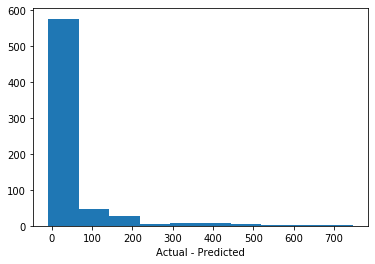

Optimized model:
{'max_error': 746.6154699325564, 'Mean AE': 39.99829309968387, 'Median AE': 8.116756916046143}


In [55]:
xgbrls = XGBRegressor(booster = "gblinear").fit(Xs_train, y_train)
print(f"Initial model:\n{evalModel(xgbrls, Xs_test, y_test)}")
params = {"booster":["gblinear"], "lambda":np.arange(0,10,1), "alpha":np.arange(0,10,1)}
xgbrls_cv = gridsearch(XGBRegressor(), params, Xs_train, y_train, random = True)
print(f"Cross-validated params:\n{xgbrls_cv['params']})")
print(f"Optimized model:\n{evalModel(xgbrls_cv['model'],Xs_test, y_test)}")

## Adaptive Boosting Regression

In [35]:
from sklearn.ensemble import AdaBoostRegressor

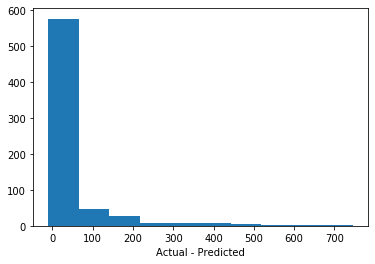

Initial model:
{'max_error': 745.1093582736621, 'Mean AE': 40.21084775282023, 'Median AE': 9.890641726338119}
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.8s


Cross-validated params:
{'n_estimators': 1, 'loss': 'square'})


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.6s finished


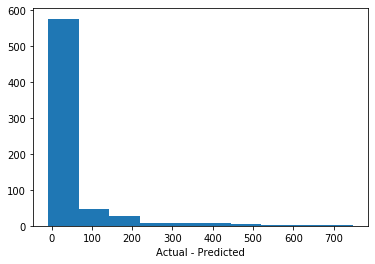

Optimized model:
{'max_error': 746.9377773212836, 'Mean AE': 39.98526149161371, 'Median AE': 8.06222267871654}


In [36]:
abr = AdaBoostRegressor(base_estimator = Lasso(alpha = 10)).fit(X_train, y_train)
print(f"Initial model:\n{evalModel(abr, X_test, y_test)}")
params = {"n_estimators":np.arange(1,100,10), "loss":["linear", "square", "exponential"]}
abr_cv = gridsearch(AdaBoostRegressor(base_estimator = Lasso(alpha = 10)), params, X_train, y_train)
print(f"Cross-validated params:\n{abr_cv['params']})")
print(f"Optimized model:\n{evalModel(abr_cv['model'],X_test, y_test)}")

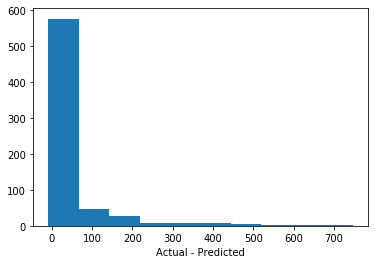

Initial model:
{'max_error': 746.3897407708116, 'Mean AE': 40.04973637990455, 'Median AE': 8.610259229188651}
Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\chris\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s


Cross-validated params:
{'n_estimators': 1, 'loss': 'linear'})


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.3s finished


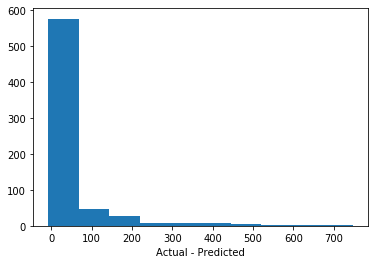

Optimized model:
{'max_error': 747.1259178817279, 'Mean AE': 39.967571468563605, 'Median AE': 7.874082118272318}


In [56]:
abrs = AdaBoostRegressor(base_estimator = Lasso(alpha = 10)).fit(Xs_train, y_train)
print(f"Initial model:\n{evalModel(abrs, Xs_test, y_test)}")
params = {"n_estimators":np.arange(1,100,10), "loss":["linear", "square", "exponential"]}
abrs_cv = gridsearch(AdaBoostRegressor(base_estimator = Lasso(alpha = 10)), params, Xs_train, y_train, random = True)
print(f"Cross-validated params:\n{abrs_cv['params']})")
print(f"Optimized model:\n{evalModel(abrs_cv['model'],Xs_test, y_test)}")

In [58]:
import pickle
with open('adaboost_model.sav', 'wb') as f:
    pickle.dump(abr_cv['model'], f)
with open('adaboost_model.sav', 'rb') as f:
    model = pickle.load(f)